In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 636


In [3]:
# URL for GET requests to retrieve city data
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# List for holding reponse information
lon = []
temp = []
temp_max = []
humidity = []
wind_speed = []
lat = []
date = []
country = []
cloudiness = []

# Loop through the list of cities and request for data on each
print("Beginning Data Retrieval")
print("-------------------------------------")
count = 0
set = 1
for index, city in enumerate(cities):
    count = count + 1
    # To avoid api call rate limits, get city weather data in sets of 50 cities,
    # with 5 seconds sleep time, and then continue
    if count == 51:
        count = 1
        set = set + 1
        time.sleep(5)
    print(f"Processing Record {count} of Set {set} | {city}")
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])
        country.append(response['sys']['country'])
        cloudiness.append(response['clouds']['all'])
    except KeyError:
        print("City not found. Skipping...")
        lat.append(np.nan)
        lon.append(np.nan)
        temp.append(np.nan)
        temp_max.append(np.nan)
        humidity.append(np.nan)
        wind_speed.append(np.nan)
        date.append(np.nan)
        country.append(np.nan)
        cloudiness.append(np.nan)
print("-------------------------------------")
print("Data Retrieval Complete")
print("-------------------------------------")


Beginning Data Retrieval
-------------------------------------
Processing Record 1 of Set 1 | port mathurin
Processing Record 2 of Set 1 | margaret river
Processing Record 3 of Set 1 | stanley
Processing Record 4 of Set 1 | udachny
Processing Record 5 of Set 1 | blackmans bay
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | luanda
Processing Record 8 of Set 1 | beroroha
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | nova vicosa
Processing Record 11 of Set 1 | alotau
City not found. Skipping...
Processing Record 12 of Set 1 | puerto baquerizo moreno
Processing Record 13 of Set 1 | kolonia
Processing Record 14 of Set 1 | wailua homesteads
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | hasaki
Processing Record 18 of Set 1 | utrik
Processing Record 19 of Set 1 | akureyri
Processing Record 20 of Set 1 | st. john's
Processing Record 21 of Set 1 | puerto natales
Proces

Processing Record 38 of Set 4 | roma
Processing Record 39 of Set 4 | 'ohonua
City not found. Skipping...
Processing Record 40 of Set 4 | salahonda
Processing Record 41 of Set 4 | ixtlahuacan del rio
Processing Record 42 of Set 4 | kulhudhuffushi
Processing Record 43 of Set 4 | lander
Processing Record 44 of Set 4 | great bend
Processing Record 45 of Set 4 | kapuskasing
Processing Record 46 of Set 4 | rongelap
Processing Record 47 of Set 4 | mirny
Processing Record 48 of Set 4 | molde
Processing Record 49 of Set 4 | kayangel
Processing Record 50 of Set 4 | savanna-la-mar
Processing Record 1 of Set 5 | burao
Processing Record 2 of Set 5 | cururupu
Processing Record 3 of Set 5 | kununurra
Processing Record 4 of Set 5 | labytnangi
Processing Record 5 of Set 5 | yokadouma
Processing Record 6 of Set 5 | meadow lake
Processing Record 7 of Set 5 | castillos
Processing Record 8 of Set 5 | pacific grove
Processing Record 9 of Set 5 | geraldton
Processing Record 10 of Set 5 | nadym
Processing Rec

Processing Record 31 of Set 8 | san antonio de pale
Processing Record 32 of Set 8 | natal
Processing Record 33 of Set 8 | oeiras
Processing Record 34 of Set 8 | antalaha
Processing Record 35 of Set 8 | assab
Processing Record 36 of Set 8 | egilsstadir
Processing Record 37 of Set 8 | bardsir
Processing Record 38 of Set 8 | pagar alam
Processing Record 39 of Set 8 | badger
Processing Record 40 of Set 8 | alaghsas
Processing Record 41 of Set 8 | port moresby
Processing Record 42 of Set 8 | fale old settlement
Processing Record 43 of Set 8 | embi
Processing Record 44 of Set 8 | hirara
Processing Record 45 of Set 8 | ndele
Processing Record 46 of Set 8 | cairns city
City not found. Skipping...
Processing Record 47 of Set 8 | bodo
Processing Record 48 of Set 8 | mocimboa
Processing Record 49 of Set 8 | zheleznodorozhnyy
Processing Record 50 of Set 8 | rokytne
Processing Record 1 of Set 9 | nichinan
Processing Record 2 of Set 9 | cotoca
Processing Record 3 of Set 9 | haiku-pauwela
Processing 

Processing Record 22 of Set 12 | gorontalo
Processing Record 23 of Set 12 | boysun
Processing Record 24 of Set 12 | desaguadero
Processing Record 25 of Set 12 | bisert'
Processing Record 26 of Set 12 | carnarvon
Processing Record 27 of Set 12 | ulladulla
Processing Record 28 of Set 12 | xining
Processing Record 29 of Set 12 | kitimat
Processing Record 30 of Set 12 | arkhangel'sk
Processing Record 31 of Set 12 | quatre cocos
Processing Record 32 of Set 12 | nakatsugawa
Processing Record 33 of Set 12 | knezha
Processing Record 34 of Set 12 | mpophomeni
Processing Record 35 of Set 12 | ahmadpur
Processing Record 36 of Set 12 | belomorsk
Processing Record 37 of Set 12 | ust'-barguzin
Processing Record 38 of Set 12 | nikolayevsk-on-amure
Processing Record 39 of Set 12 | progreso
Processing Record 40 of Set 12 | yemetsk
Processing Record 41 of Set 12 | tambo
Processing Record 42 of Set 12 | slave lake
Processing Record 43 of Set 12 | dhuusamarreeb
Processing Record 44 of Set 12 | tanrake vil

# Convert raw data to dataframe

In [4]:
cities_df = pd.DataFrame({
    "City": cities,
    "Lat": lat,
    "Lng": lon,
    "Max Temp": temp_max,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date,
          })

# Drop any cities that were skipped because they could not return any response from OpenWeatherMap API.
cities_df = cities_df.dropna(how="any")

# Export the city data into a .csv file.
cities_df.to_csv("./output_data/cities.csv", index=False)

# Display the DataFrame
cities_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port mathurin,-19.6833,63.4167,74.64,78.0,62.0,16.13,MU,1.690448e+09
1,margaret river,-33.9500,115.0667,56.75,66.0,96.0,13.44,AU,1.690448e+09
2,stanley,54.8680,-1.6985,61.29,94.0,75.0,3.44,GB,1.690448e+09
3,udachny,66.4167,112.4000,62.60,60.0,100.0,3.22,RU,1.690448e+09
4,blackmans bay,-43.0167,147.3167,54.73,63.0,100.0,7.36,AU,1.690448e+09
...,...,...,...,...,...,...,...,...,...
631,kusheriki,10.5328,6.4422,81.48,72.0,100.0,6.60,NG,1.690448e+09
632,middlebury (village),44.0153,-73.1673,73.94,79.0,40.0,3.44,US,1.690448e+09
633,karasburg,-28.0167,18.7500,59.86,21.0,0.0,6.42,NA,1.690448e+09
634,galliano,29.4422,-90.2992,77.00,79.0,0.0,0.54,US,1.690448e+09


In [5]:
cities_df["Humidity"].describe()

count    613.000000
mean      68.104405
std       23.055181
min        6.000000
25%       56.000000
50%       74.000000
75%       86.000000
max      100.000000
Name: Humidity, dtype: float64

In [6]:
humidity_101 = cities_df[(cities_df["Humidity"] > 100)].index
humidity_101

Index([], dtype='int64')

In [7]:
clean_city_data = cities_df.drop(humidity_101, inplace=False)
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port mathurin,-19.6833,63.4167,74.64,78.0,62.0,16.13,MU,1.690448e+09
1,margaret river,-33.9500,115.0667,56.75,66.0,96.0,13.44,AU,1.690448e+09
2,stanley,54.8680,-1.6985,61.29,94.0,75.0,3.44,GB,1.690448e+09
3,udachny,66.4167,112.4000,62.60,60.0,100.0,3.22,RU,1.690448e+09
4,blackmans bay,-43.0167,147.3167,54.73,63.0,100.0,7.36,AU,1.690448e+09
...,...,...,...,...,...,...,...,...,...
631,kusheriki,10.5328,6.4422,81.48,72.0,100.0,6.60,NG,1.690448e+09
632,middlebury (village),44.0153,-73.1673,73.94,79.0,40.0,3.44,US,1.690448e+09
633,karasburg,-28.0167,18.7500,59.86,21.0,0.0,6.42,NA,1.690448e+09
634,galliano,29.4422,-90.2992,77.00,79.0,0.0,0.54,US,1.690448e+09


# Create the Scatter Plots Requested
Latitude Vs. Temperature

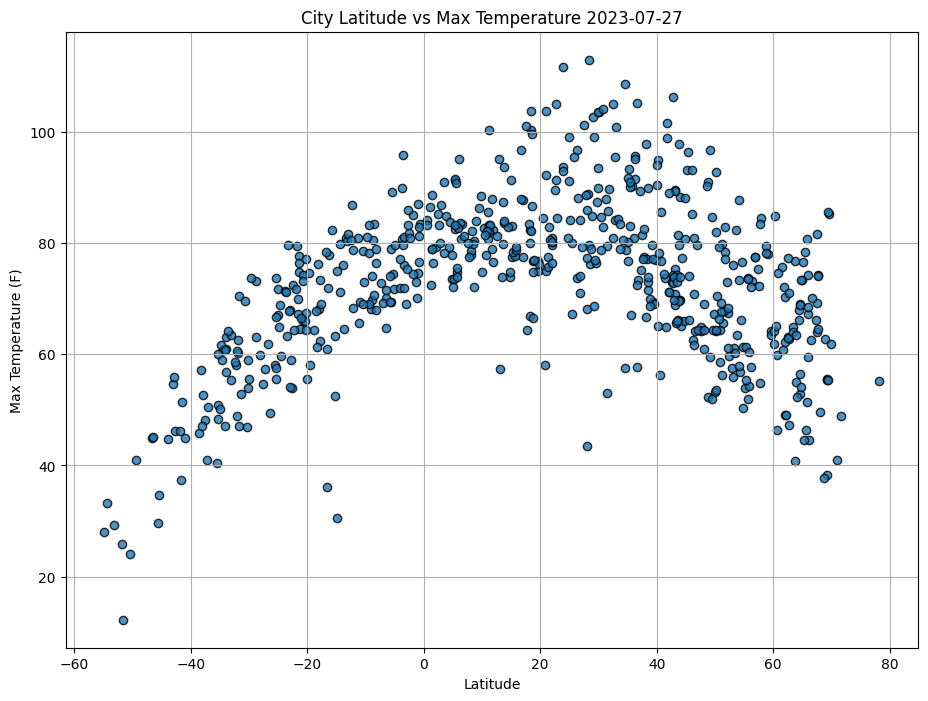

In [8]:
date_now = datetime.date(datetime.now())

# Create a scatter plot for latitude vs max temperature.
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Max Temp"]

fig1, ax1 = plt.subplots(figsize=(11,8))
plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
plt.title(f"City Latitude vs Max Temperature {date_now}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# Save the figure
plt.savefig("./output_data/latitude_vs_max_temp.png", bbox_inches="tight")
plt.show()

# Latitude vs Humidity

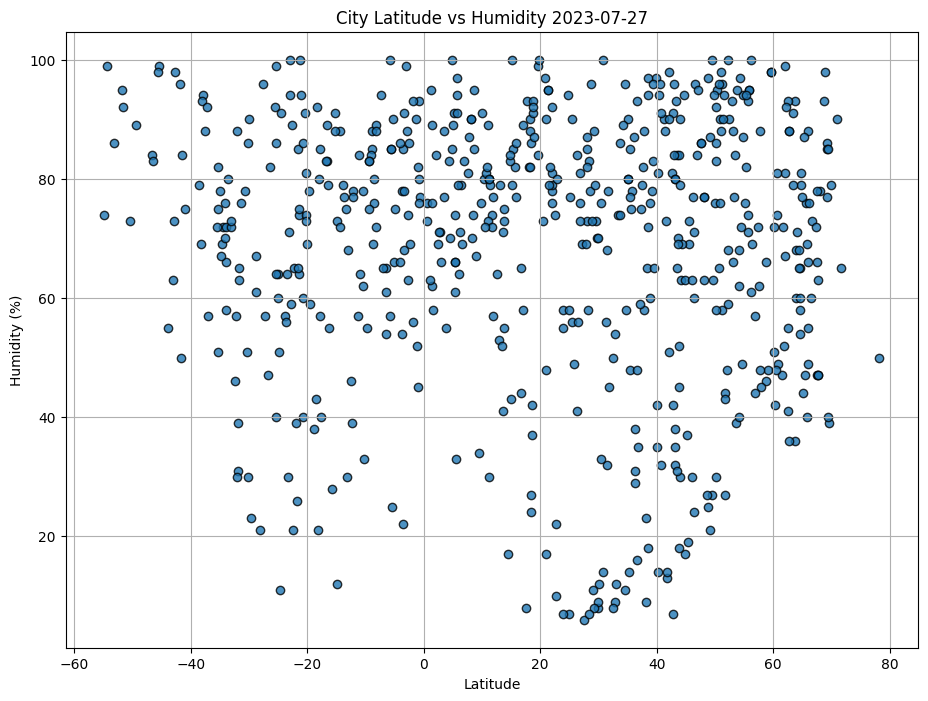

In [9]:
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Humidity"]

fig1, ax1 = plt.subplots(figsize=(11, 8))
plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity {date_now}")
plt.grid()

# Save the figure
plt.savefig("./output_data/latitude_vs_humidity.png", bbox_inches="tight")
plt.show()

# Latitude vs Cloudiness

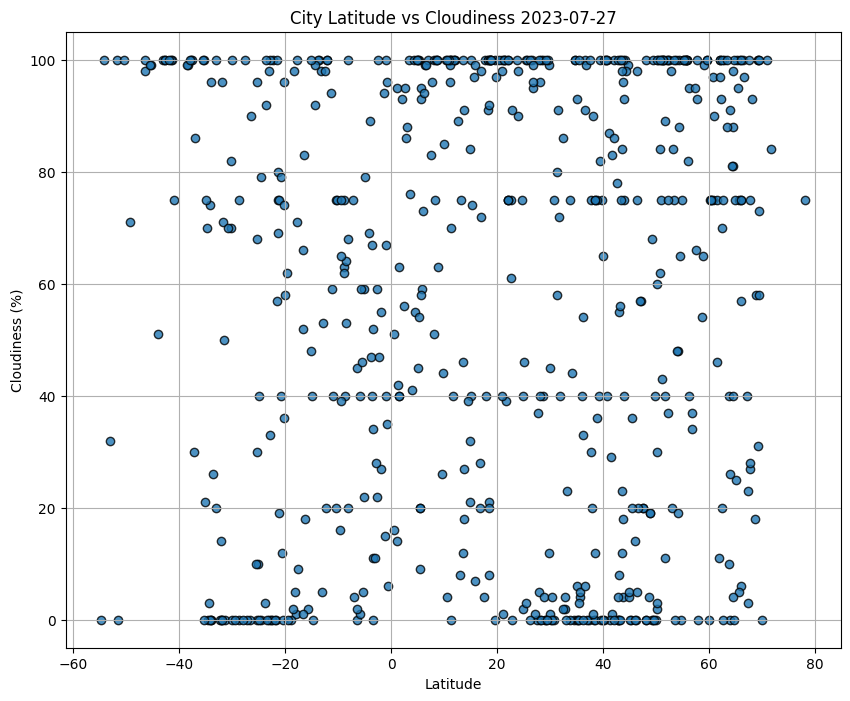

In [10]:
# Create a scatter plot for latitude vs cloudiness.
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Cloudiness"]

fig1, ax1 = plt.subplots(figsize=(10,8))
markersize=12
plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness {date_now}")
plt.grid()

# Save the figure
plt.savefig("./output_data/latitude_vs_cloudiness.png", bbox_inches="tight")
plt.show()

# Latitude vs. Wind Speed Plot

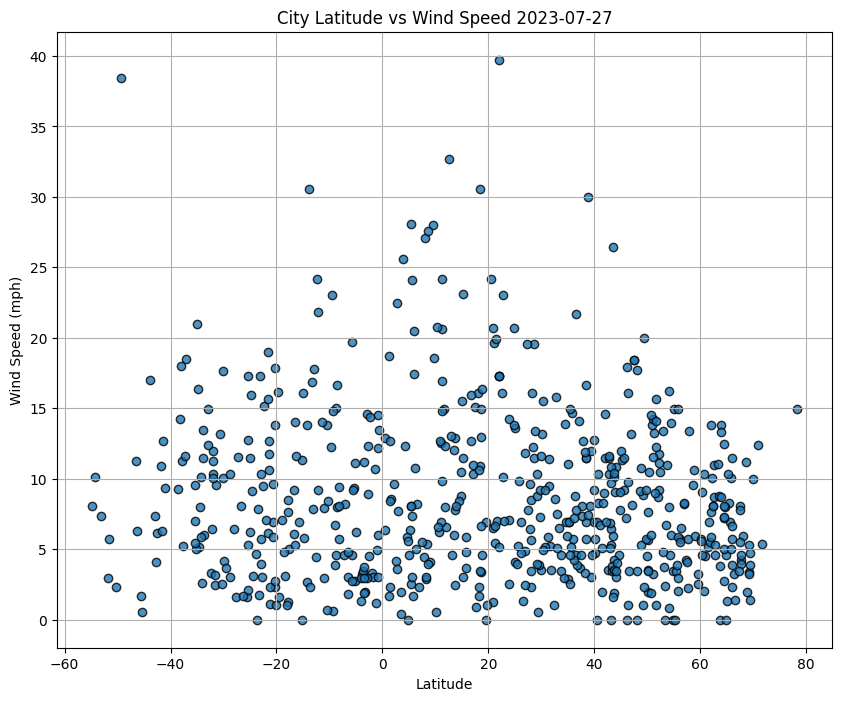

In [11]:
# Create a scatter plot for latitude vs wind speed.
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Wind Speed"]

fig1, ax1 = plt.subplots(figsize=(10,8))
markersize=12
plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs Wind Speed {date_now}")
plt.grid()

# Save the figure
plt.savefig("./output_data/latitude_vs_wind_speed.png", bbox_inches="tight")
plt.show()

# Linear Regression

In [12]:
# Create a function to create Linear Regression plots for remaining activities
def plot_linear_regression(x_values, y_values, x_label, y_label, hemisphere, text_coordinates, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    # Generate plots     
    fig1, ax1 = plt.subplots(figsize=(12,8))
    plt.scatter(x_values, y_values, edgecolor="black", linewidth=1, marker="o", alpha=0.8)
    plt.plot(x_values,regress_values,"r-")
    date_now = datetime.date(datetime.now())
    plt.title(f"{hemisphere} Hemisphere - {x_label} vs {y_label} {date_now}",fontsize = 15)
    plt.xlabel(x_label,fontsize=14)
    plt.ylabel(y_label,fontsize=14)
    if ylim is not None:
        plt.ylim(0, ylim)
    plt.annotate(line_eq, text_coordinates, fontsize=20, color="red")
    
    # Print r square value
    print(f"The r-squared is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")

In [13]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_weather_df = clean_city_data.loc[clean_city_data["Lat"] >= 0]

northern_hemi_weather_df.head()
#southern_hemi_weather_df = clean_city_data.loc[clean_city_data["Lat"] < 0]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,stanley,54.8680,-1.6985,61.29,94.0,75.0,3.44,GB,1.690448e+09
3,udachny,66.4167,112.4000,62.60,60.0,100.0,3.22,RU,1.690448e+09
8,albany,42.6001,-73.9662,72.90,81.0,78.0,3.56,US,1.690448e+09
12,kolonia,50.9333,6.9500,64.29,90.0,75.0,13.80,DE,1.690448e+09
13,wailua homesteads,22.0669,-159.3780,79.59,81.0,75.0,17.27,US,1.690448e+09


In [14]:
southern_hemi_weather_df = clean_city_data.loc[clean_city_data["Lat"] < 0]
southern_hemi_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port mathurin,-19.6833,63.4167,74.64,78.0,62.0,16.13,MU,1.690448e+09
1,margaret river,-33.9500,115.0667,56.75,66.0,96.0,13.44,AU,1.690448e+09
4,blackmans bay,-43.0167,147.3167,54.73,63.0,100.0,7.36,AU,1.690448e+09
5,grytviken,-54.2811,-36.5092,33.33,99.0,100.0,10.11,GS,1.690448e+09
6,luanda,-8.8368,13.2343,69.80,88.0,75.0,4.61,AO,1.690448e+09


The r-squared is: 0.2674895169497105
The correlation between both factors is -0.52


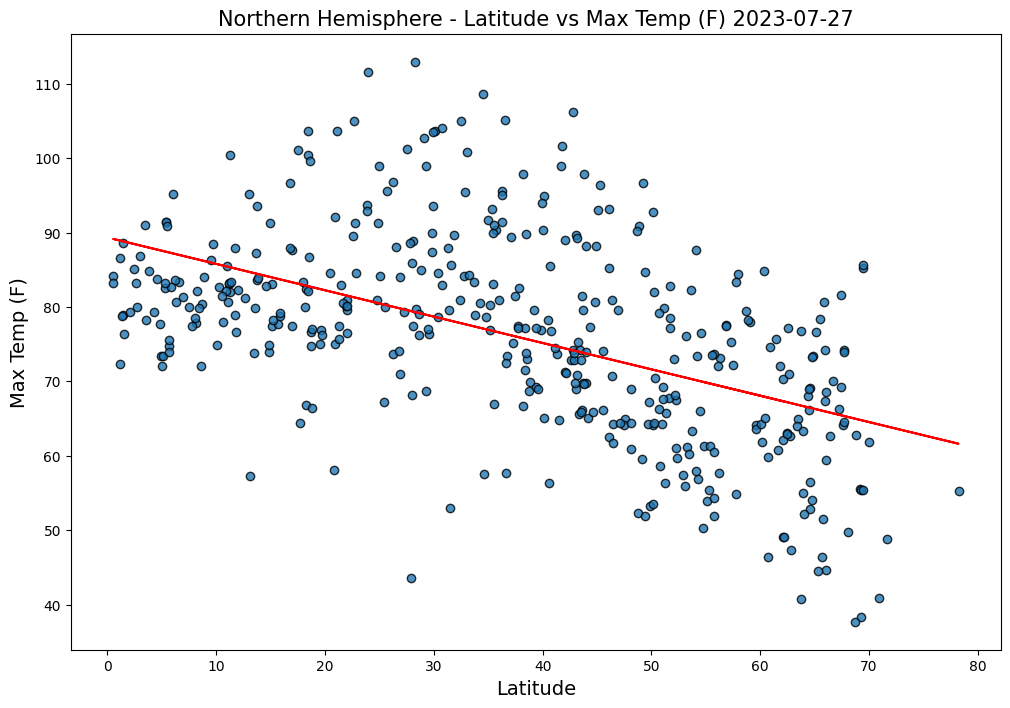

In [15]:
# Create a scatter plot for latitude vs max temp (northern hemisphere)
x_values = northern_hemi_weather_df["Lat"]
y_values = northern_hemi_weather_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Max Temp (F)", "Northern", (10, 10))

# Save the figure
plt.savefig("./output_data/northern_hem_linear_lat_vs_max_temp.png", bbox_inches="tight")
plt.show()

# Southerm hemisphere - Lat vs Max Temp

The r-squared is: 0.6603495109715538
The correlation between both factors is 0.81


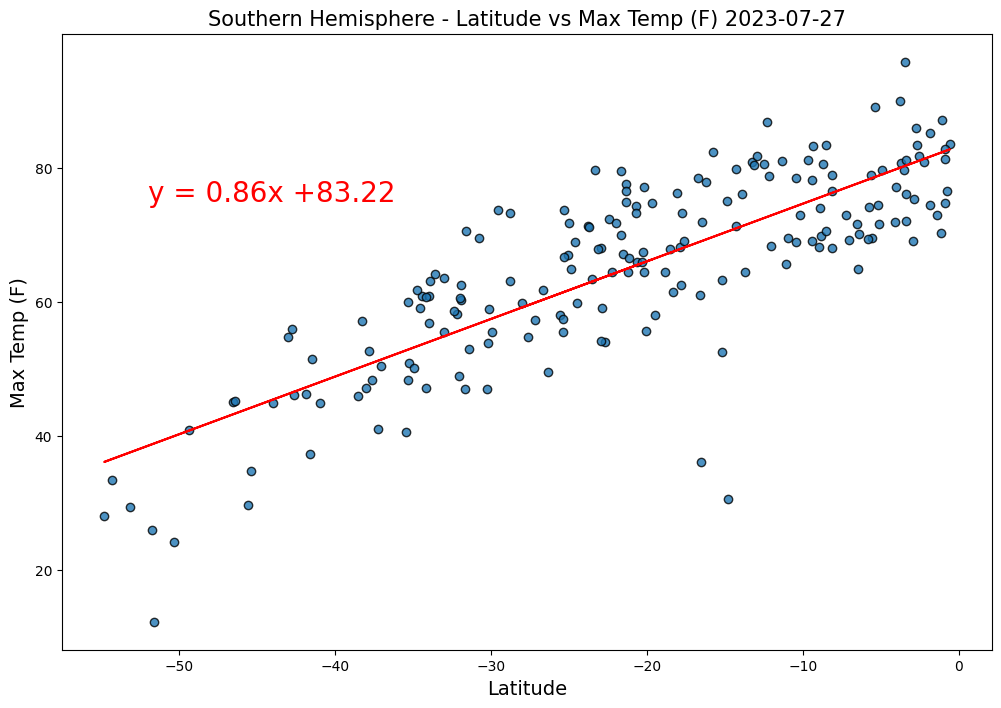

In [16]:
# Create a scatter plot for latitude vs cloudiness (southern hemisphere)
x_values = southern_hemi_weather_df["Lat"]
y_values = southern_hemi_weather_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Max Temp (F)", "Southern", (-52, 75))

# Save the figure
plt.savefig("./output_data/southern_hem_linear_lat_vs_max_temp.png", bbox_inches="tight")
plt.show()

*Discussion about the linear relationship: The correlation between latitude and maximum temperature is strong for both the hemispheres. It is higher for southern hemisphere (0.81), indicating that as we move away from the equator, the maximum temperature keeps dropping in a more linear manner.

# Northern hemisphere - Lat vs Humidity

The r-squared is: 0.0019905254198888576
The correlation between both factors is -0.04


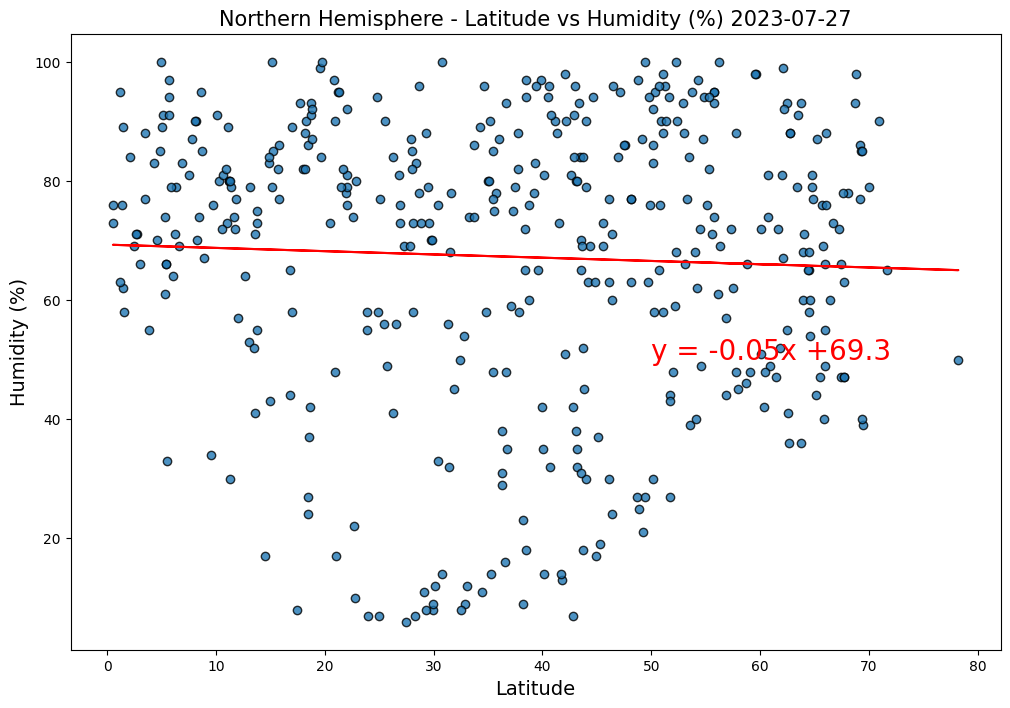

In [17]:
# Create a scatter plot for latitude vs humditiy (northern hemisphere)
x_values = northern_hemi_weather_df['Lat']
y_values = northern_hemi_weather_df['Humidity']
plot_linear_regression(x_values, y_values, "Latitude", "Humidity (%)", "Northern",(50,50))
plt.savefig("./output_data/northern_hem_linear_lat_vs_humidity.png", bbox_inches="tight")
plt.show()

# Southern hemisphere - Lat vs Humidity


The r-squared is: 0.0032461329409650113
The correlation between both factors is -0.06


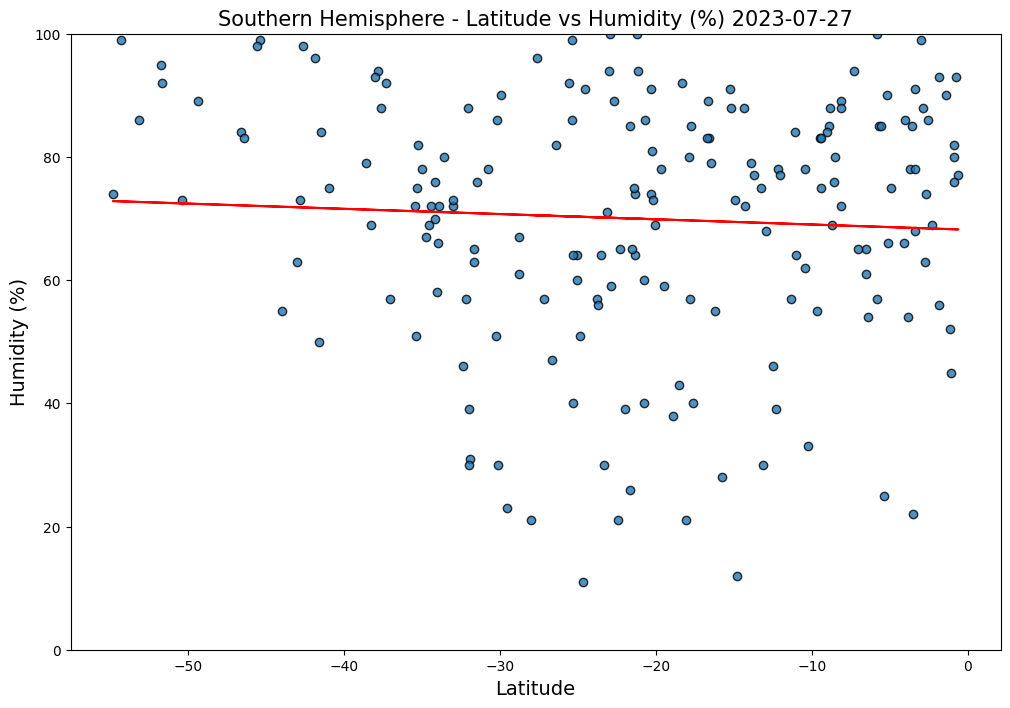

In [18]:
# Create a scatter plot for latitude vs humditiy (southern hemisphere)
x_values = southern_hemi_weather_df['Lat']
y_values = southern_hemi_weather_df['Humidity']
plot_linear_regression(x_values, y_values, "Latitude", "Humidity (%)", "Southern",(50, 50), 100)
plt.savefig("./output_data/southern_hem_linear_lat_vs_humudity.png", bbox_inches="tight")
plt.show()

There is no correlation between latitude and humidity for southern hemisphere (0.06). For northern hemisphere, it is the same case, expect for the higher latitudes.

# Northern hemisphere - Lat vs Cloudiness


The r-squared is: 0.0019585007981428623
The correlation between both factors is -0.04


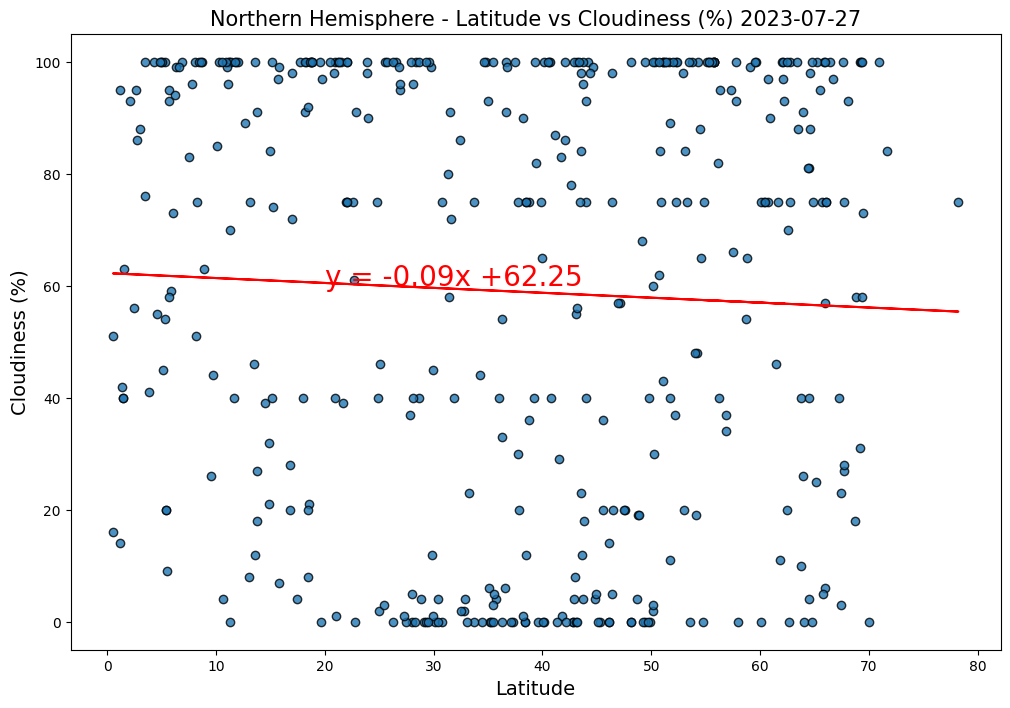

In [19]:
# Create a scatter plot for latitude vs cloudiness (northern hemisphere)
x_values = northern_hemi_weather_df['Lat']
y_values = northern_hemi_weather_df['Cloudiness']
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness (%)", "Northern", (20, 60))

plt.savefig("./output_data/northern_hem_linear_lat_vs_cloudiness.png", bbox_inches="tight")
plt.show()

# Southern hemisphere - Lat vs Cloudiness

The r-squared is: 0.017667609649745265
The correlation between both factors is -0.13


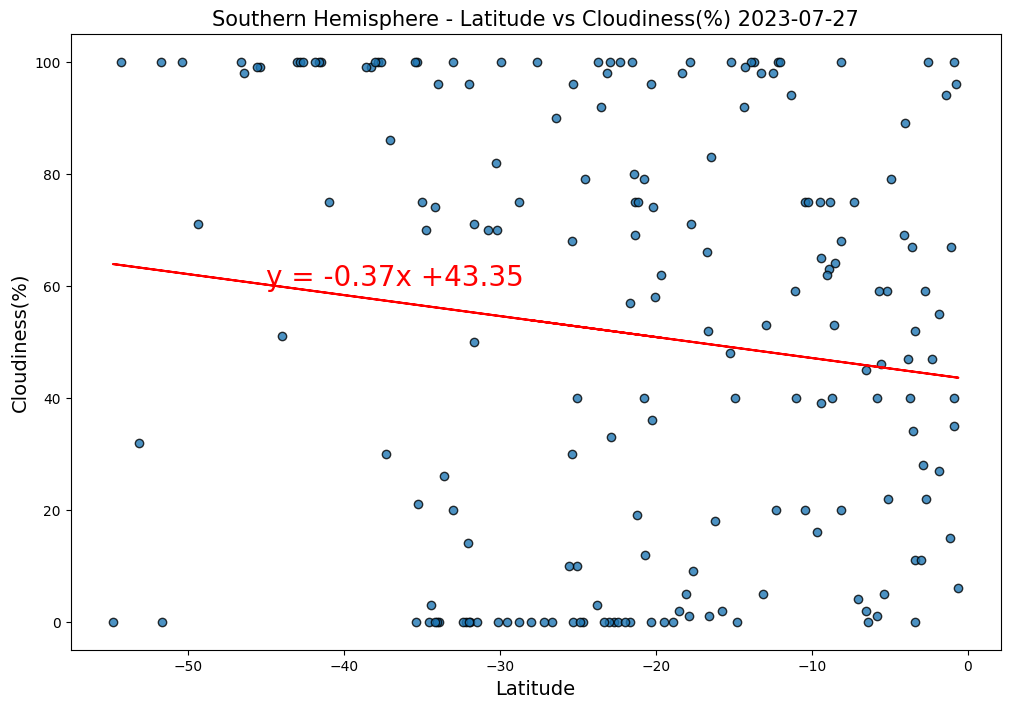

In [20]:
# Create a scatter plot for latitude vs cloudiness (southern hemisphere)
x_values = southern_hemi_weather_df['Lat']
y_values = southern_hemi_weather_df['Cloudiness']
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness(%)", "Southern",(-45, 60))
plt.savefig("./output_data/southern_hem_linear_lat_vs_cloudiness.png", bbox_inches="tight")
plt.show()

There is no correlation between latitude and cloudiness for both, southern and northern hemispheres. Both show scattered values all over the plots.

# Northern hemisphere - Lat vs Wind Speed

The r-squared is: 0.05066557494553371
The correlation between both factors is -0.23


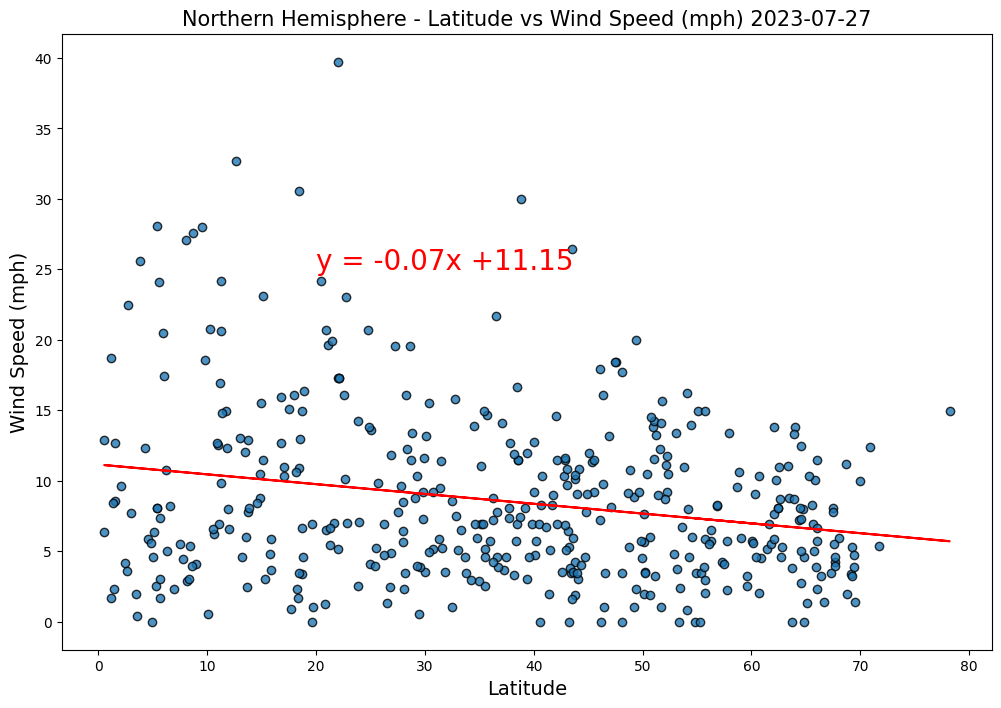

In [21]:
# Create a scatter plot for latitude vs wind speed(northern hemisphere)
x_values = northern_hemi_weather_df['Lat']
y_values = northern_hemi_weather_df['Wind Speed']
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed (mph)", "Northern",(20, 25))
plt.savefig("./output_data/northern_hem_linear_lat_vs_wind_speed.png", bbox_inches="tight")
plt.show()

# Southern hemisphere - Lat vs Wind Speed

The r-squared is: 0.00743891614094757
The correlation between both factors is -0.09


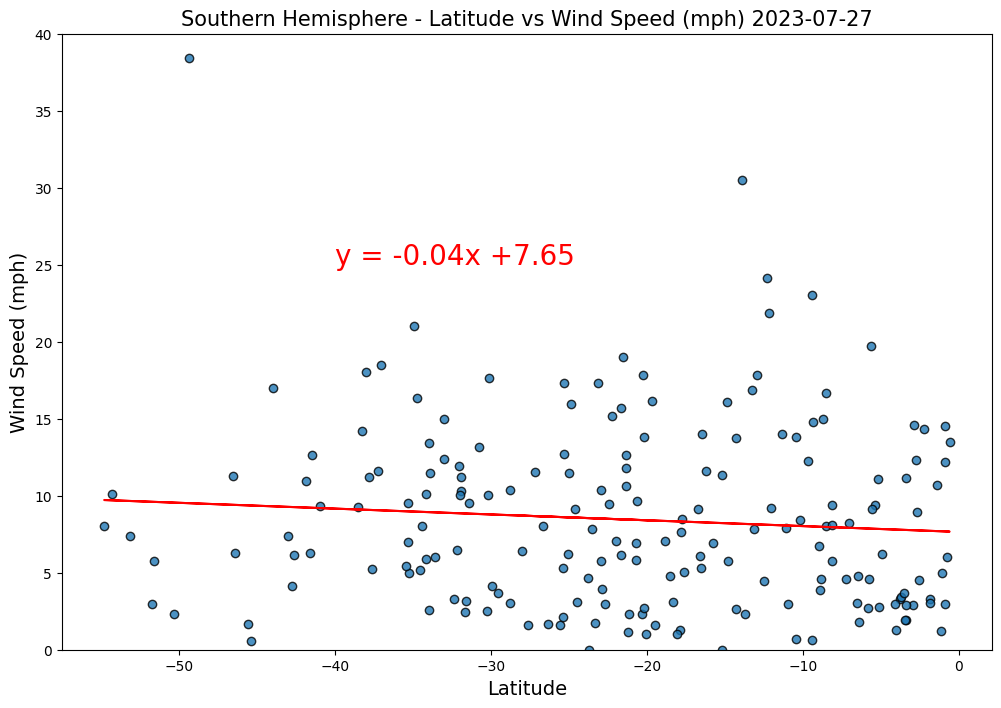

In [22]:
# Create a scatter plot for latitude vs wind speed (southern hemisphere)
x_values = southern_hemi_weather_df['Lat']
y_values = southern_hemi_weather_df['Wind Speed']
plot_linear_regression(x_values, y_values, "Latitude", "Wind Speed (mph)", "Southern",(-40, 25), ylim=40)
plt.savefig("./output_data/southern_hem_linear_lat_vs_wind_speed.png", bbox_inches="tight")
plt.show()

The r-squared is:0.00743891614094757

The correlation between both factors is -0.09

There is no correlation between latitude and wind speed either, for both hemispheres. Both show evenly scattered values over the latitudes.